# Structural Estimation PS2 Jose Cerda

# 1.Health claim amounts and the GB family of distributions

In [97]:
# Import the necessary libraries
import numpy as np
import scipy.stats as sts
import requests
import statistics
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import scipy.special as spc

In [99]:
# Import the data
#url = ('http://localhost:8888/tree/Documents/GitHub/StructEst_W20/ProblemSets/PS2')
#('C:\Users\joset\Documents\GitHub\StructEst_W20\ProblemSets\PS2')
#data_file = requests.get(url, allow_redirects=True)
#open('clms.txt', 'wb').write(data_file.content)

# Load the data as a NumPy array
clms_amt = np.loadtxt('C:\\Users\joset\Documents\GitHub\StructEst_W20\ProblemSets\PS2\clms.txt')
#clms_amt = np.loadtxt('clms.txt')

# a)Calculate and report the mean, median, maximum, minimum, and standard deviation of monthly health expenditures for these data.

In [100]:
#Statistics about claims
mu = statistics.mean(clms_amt)
med = statistics.median(clms_amt)
maxi = max(clms_amt)
mini = min(clms_amt)
sigma = statistics.stdev(clms_amt)
  
# Report
print ("Statistics of Monthly health expenditures (Dollars)")
print("Mean:", mu)
print("Median:", med)
print("Maximum:", maxi)
print("Minimum:", mini)
print("Stdev:", sigma)

Statistics of Monthly health expenditures (Dollars)
Mean: 720.2779753272437
Median: 172.21
Maximum: 227967.25
Minimum: 0.01
Stdev: 3972.850824119446


# Plot two histograms of the data in which the y-axis gives the percent of observations in the particular bin of health expenditures and the x-axis gives the value of monthly health expenditures.

<IPython.core.display.Javascript object>


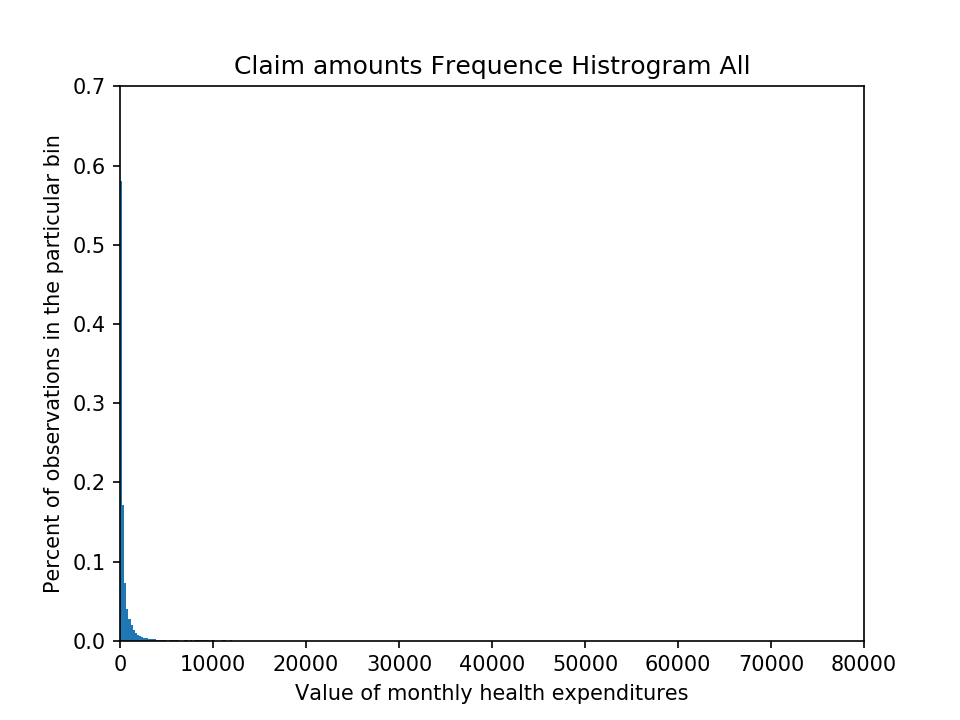

(0, 0.7)

In [103]:
#Frequency Histogram all
num_bins = 1000
weights = (1 / clms_amt.shape[0]) * np.ones_like(clms_amt)
n, bin_cuts, patches = plt.hist(clms_amt, num_bins, weights=weights)
plt.title('Claim amounts Frequence Histrogram All')
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in the particular bin')
plt.xlim([0, 80000])  # This gives the xmin and xmax to be plotted
plt.ylim([0, 0.7])  # This gives the ymin and ymax to be plotted

In [104]:
#Sum of bins
print(n.sum())

1.0000000000000322


<IPython.core.display.Javascript object>


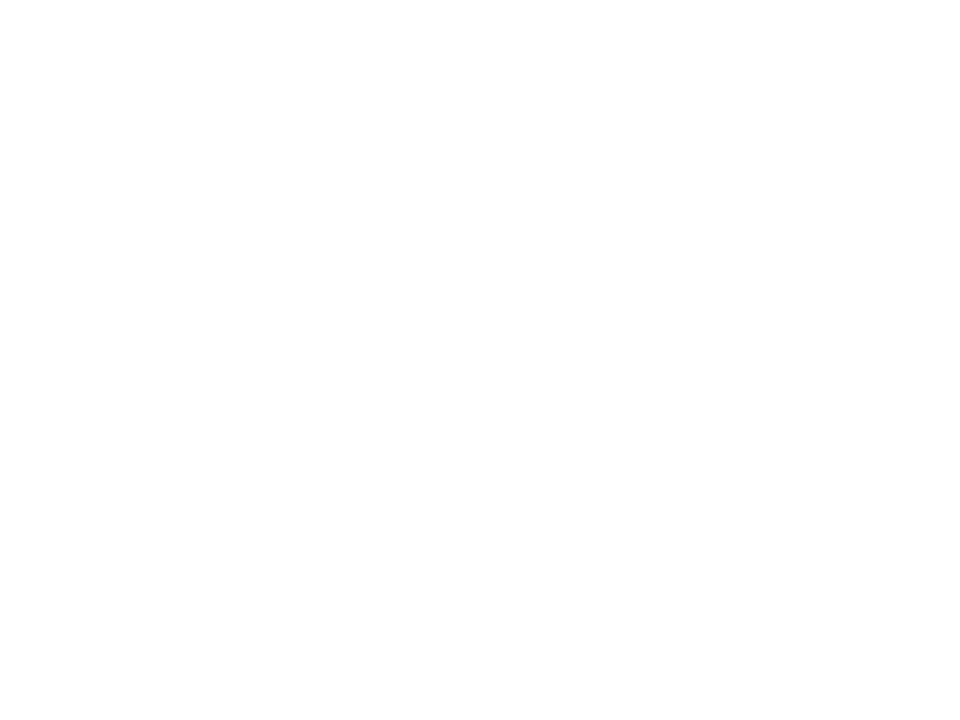

<IPython.core.display.Javascript object>


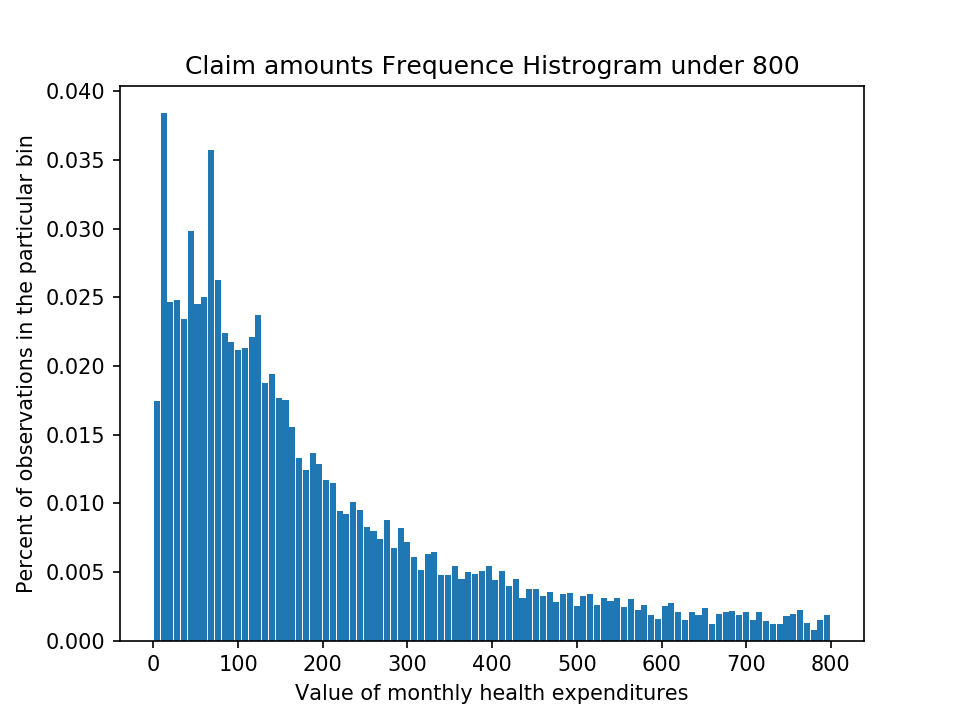

Text(0, 0.5, 'Percent of observations in the particular bin')

In [105]:
#Frequency Histogram under 800
plt.clf()
plt.cla()
plt.close()
clms_800 = clms_amt[clms_amt <= 800]
num_bins = 100
#if clms_amt <=800:
#    weights = (1 / clms_amt.shape[0]) * np.ones_like(clms_amt)
#else:
#    weights = 0
weights = (1 / clms_amt.shape[0]) * np.ones_like(clms_800)
count, num_bins, patches = plt.hist(clms_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Claim amounts Frequence Histrogram under 800')
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in the particular bin')
#plt.xlim([0, 800])  # This gives the xmin and xmax to be plotted
#plt.ylim([0, 1])  # This gives the ymin and ymax to be plotted

In [106]:
#Sum of bins
print(n.sum())
print(count.sum())

print('Clearly th second histogram is more informative to the eye. This is because the tail is too long. In other words, there are many different claims over 800 dolars, however, they are unfrequent. So, it makes sense to look at those that are much more frequent.')

1.0000000000000322
0.8494208494208465


# b)Using MLE, fit the gamma GA on the data

In [107]:
#Define a GA pdf
def gamma_ga_pdf(xvals, alpha, beta): 
    #pdf_vals = ((1 / ((beta ** alpha) * spc.gamma(alpha)))*((xvals) ** ((alpha) - 1)) * (np.exp(-(xvals)/beta)))
    gamma_arg = spc.gamma(alpha)
    pdf_vals = (1/((beta**alpha) *gamma_arg))*(xvals**(alpha-1))*(np.exp(-(xvals/beta)))
    return pdf_vals

In [108]:
#Initial guesses
beta_0 = (sigma**2)/mu
alpha_0 = mu/beta_0

In [109]:
# Define log likelihood function for gamma
def log_lik_gamma_ga(xvals, alpha, beta):
    pdf_vals = gamma_ga_pdf(xvals, alpha, beta)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val
print('alpha_0', alpha_0, 'beta_0', beta_0)
print('Log-likelihood GA_0: ', log_lik_gamma_ga(clms_amt, alpha_0, beta_0))

alpha_0 0.032869701035793376 beta_0 21913.128280141606
Log-likelihood GA_0:  -93550.33315018797


In [110]:
#Define criterion function for GA
def crit(params, *args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_lik_gamma_ga(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [111]:
#Minimize GA using MLE
import scipy.optimize as opt
clms_amt[clms_amt < 1e-10] = 1e-10
alpha_init = alpha_0
beta_init = beta_0
mle_args = clms_amt
params_init = np.array([alpha_init, beta_init])
#print("args", params_init)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, None)), tol=1e-12)
alpha_ga_mle, beta_ga_mle = results_uncstr.x
ga_mle = log_lik_gamma_ga(clms_amt, alpha_ga_mle, beta_ga_mle)
print('alpha_ga_mle=', alpha_ga_mle)
print('beta_ga_mle=', beta_ga_mle)
print('Log_lik_ga_mle',ga_mle)

alpha_ga_mle= 0.5570632380271622
beta_ga_mle= 998.4240425089374
Log_lik_ga_mle -77001.36878468955


<IPython.core.display.Javascript object>


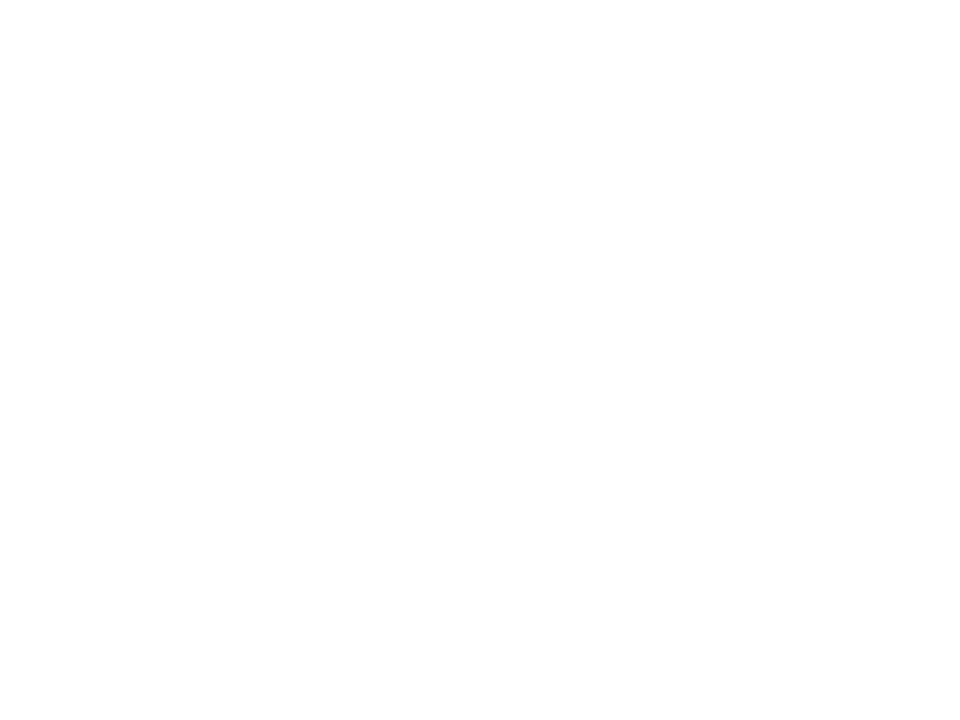

<IPython.core.display.Javascript object>


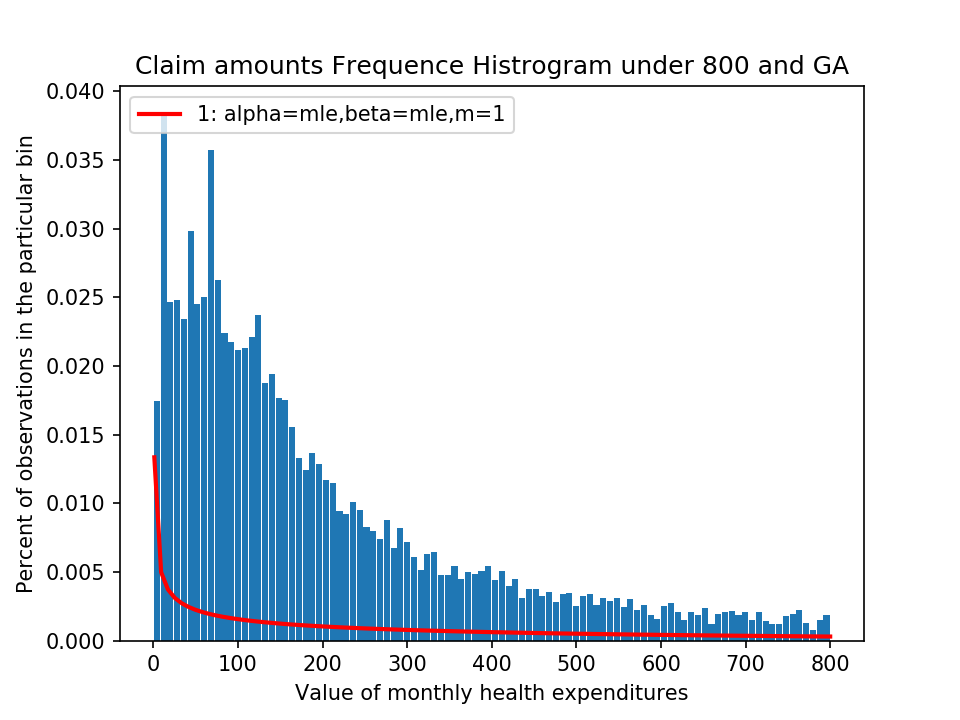

Alpha: 0.5570632380271622
Beta: 998.4240425089374
m: 1


In [112]:
#Frequency Histogram under 800 with GA_mle
plt.clf()
plt.cla()
plt.close()
clms_800 = clms_amt[clms_amt <= 800]
num_bins = 100
weights = (1 / clms_amt.shape[0]) * np.ones_like(clms_800)
count, num_bins, patches = plt.hist(clms_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Claim amounts Frequence Histrogram under 800 and GA')
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in the particular bin')

# Plot smooth line with distribution 1
dist_clms = np.linspace(1, 800, 100)
beta_p = beta_ga_mle
alpha_p = alpha_ga_mle
m_p = 1
print("Alpha:", alpha_p)
print("Beta:", beta_p)
print("m:", m_p)
plt.plot(dist_clms, gamma_ga_pdf(dist_clms, alpha_p, beta_p),
         linewidth=2, color='r', label='1: alpha=mle,beta=mle,m=1')
plt.legend(loc='upper left')

# c) Using MLE, fit the generalized gamma distribution to the individual observation data

In [114]:
#Define GG pdf
#import scipy.special as spc
def gamma_gg_pdf(xvals, alpha, beta, m):
    gamma_arg = (alpha/m)
    gamma_calc = spc.gamma(gamma_arg)
   
    pdf_vals = (m/((beta**alpha) *gamma_calc))*(xvals**(alpha-1))*(np.exp(-((xvals/beta)**m)))
    return pdf_vals

In [115]:
# Define log likelihood function for GG
def log_lik_gamma_gg(xvals, alpha, beta, m):
    pdf_vals = gamma_gg_pdf(xvals, alpha, beta, m)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood GG_0: ', log_lik_gamma_gg(clms_amt, alpha_ga_mle, beta_ga_mle, 1))

Log-likelihood GG_0:  -77001.36878468955


In [116]:
#Define criterion function for GG
def crit_gg(params, *args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_lik_gamma_gg(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [117]:
#Optimize for GG using MLE
import scipy.optimize as opt
#clms_amt[clms_amt < 1e-10] = 1e-10
alpha_init = alpha_ga_mle
beta_init = beta_ga_mle
m_init = 1
mle_args = clms_amt
params_init = np.array([alpha_init, beta_init, m_init])
#print("args", params_init)
results_uncstr = opt.minimize(crit_gg, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, None), (1e-10, None)), tol=1e-12)
alpha_gg_mle, beta_gg_mle, m_gg_mle = results_uncstr.x
gg_mle = log_lik_gamma_gg(clms_amt, alpha_gg_mle, beta_gg_mle, m_gg_mle)
print('alpha_gg_mle=', alpha_gg_mle)
print('beta_gg_mle=', beta_gg_mle)
print('m_gg_mle=', m_gg_mle)
print('Log_lik_gg_mle',gg_mle)

alpha_gg_mle= 1.201863829651293
beta_gg_mle= 6.125170836345546
m_gg_mle= 0.337753516697089
Log_lik_gg_mle -75295.2588187889


<IPython.core.display.Javascript object>


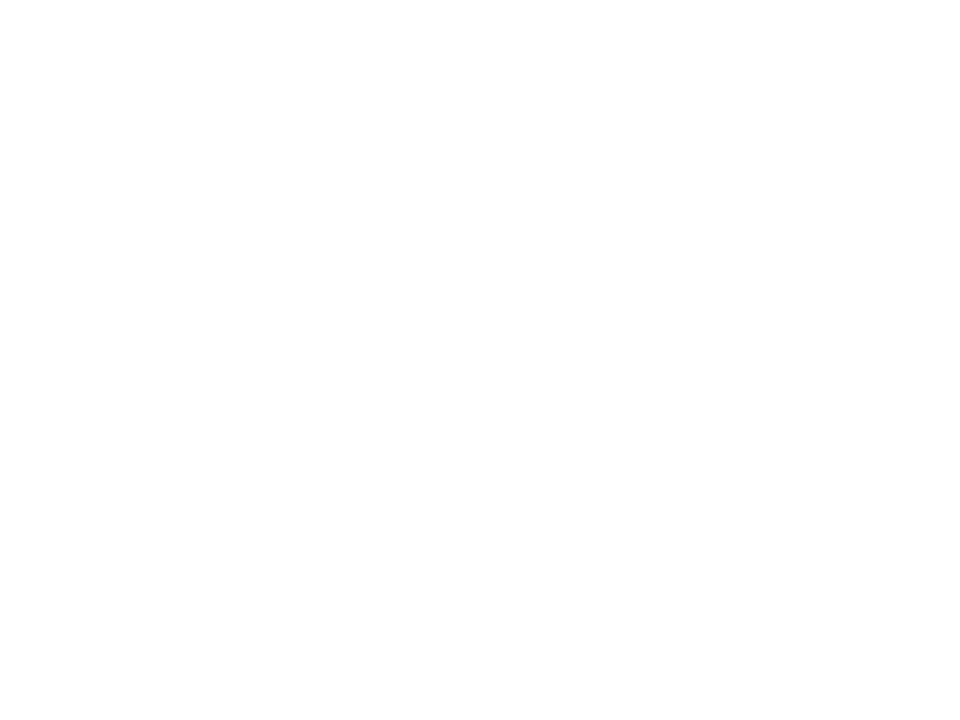

<IPython.core.display.Javascript object>


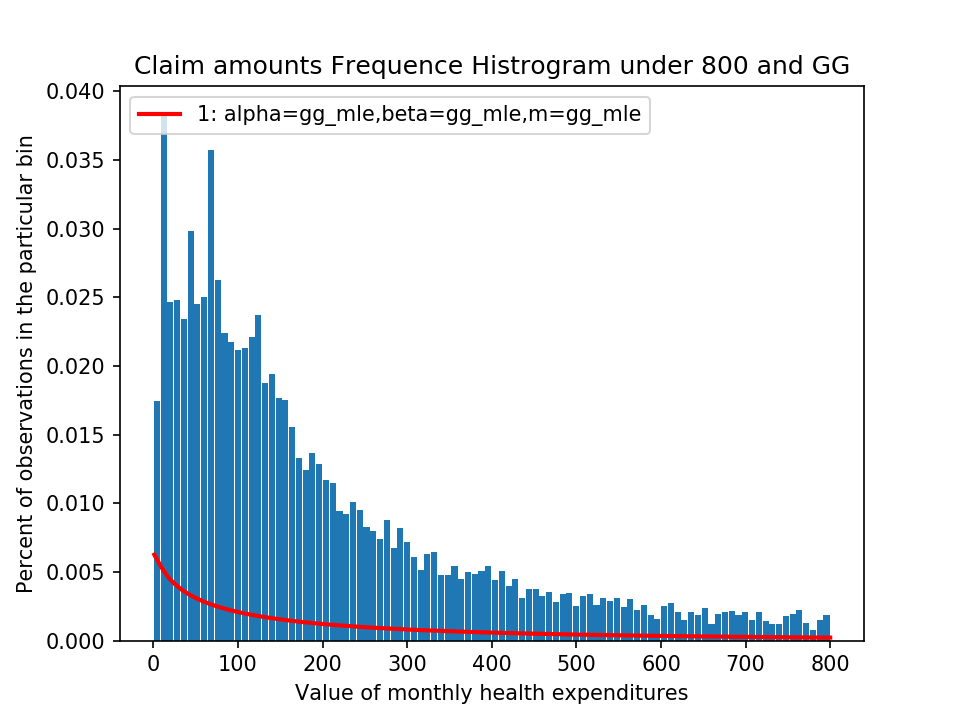

Alpha: 1.201863829651293
Beta: 6.125170836345546
m: 0.337753516697089


In [118]:
#Frequency Histogram under 800 with GG
plt.clf()
plt.cla()
plt.close()
clms_800 = clms_amt[clms_amt <= 800]
num_bins = 100
weights = (1 / clms_amt.shape[0]) * np.ones_like(clms_800)
count, num_bins, patches = plt.hist(clms_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Claim amounts Frequence Histrogram under 800 and GG')
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in the particular bin')

# Plot smooth line with distribution 1
dist_clms = np.linspace(1, 800, 100)
beta_p = beta_gg_mle
alpha_p = alpha_gg_mle
m_p = m_gg_mle
print("Alpha:", alpha_p)
print("Beta:", beta_p)
print("m:", m_gg_mle)
plt.plot(dist_clms, gamma_gg_pdf(dist_clms, alpha_p, beta_p, m_p),
         linewidth=2, color='r', label='1: alpha=gg_mle,beta=gg_mle,m=gg_mle')
plt.legend(loc='upper left')

# d) Using MLE, fit the generalized beta 2 GB2

In [120]:
#Initial guesses
a_0 = m_gg_mle
q_0 = 10000
b_0 = q_0**(1/m_gg_mle)*beta_gg_mle
p_0 = alpha_gg_mle/m_gg_mle

In [121]:
#Define GB2 pdf
#import scipy.special as spc
def gb2_pdf(xvals, a, b, p, q):
    
    beta_calc = spc.beta(p,q)
    pdf_vals = (a*(xvals**((a*p)-1)))/(b**(a*p)*beta_calc*(1+(xvals/b)**a)**(p+q))
    
    return pdf_vals

In [122]:
# Define log likelihood function for GB2
def log_lik_gb2(xvals, a, b, p, q):
    pdf_vals = gb2_pdf(xvals, a, b, p, q)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood GB2_0: ', log_lik_gb2(clms_amt, a_0, b_0, p_0, q_0))

Log-likelihood GB2_0:  -75294.83209185342


In [123]:
#Define crterion function for GB2
def crit_gb2(params, *args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_lik_gb2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [124]:
#Optimize GB2 using MLE
import scipy.optimize as opt
#clms_amt[clms_amt < 1e-10] = 1e-10
a_init = a_0
b_init = b_0
p_init = p_0
q_init = q_0
mle_args = clms_amt
params_init = np.array([a_init, b_init, p_init, q_init])
#print("args", params_init)
results_uncstr = opt.minimize(crit_gb2, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, None), (1e-10, None), (1e-10, None)), tol=1e-12)
a_gb2_mle, b_gb2_mle, p_gb2_mle, q_gb2_mle = results_uncstr.x
gb2_mle = log_lik_gb2(clms_amt, a_gb2_mle, b_gb2_mle, p_gb2_mle, q_gb2_mle)
print('a_gb2_mle=', a_gb2_mle)
print('b_gb2_mle=', b_gb2_mle)
print('p_gb2_mle=', p_gb2_mle)
print('q_gb2_mle=', q_gb2_mle)
print('Log_lik_gb2_mle',gb2_mle)

a_gb2_mle= 0.3384012279152383
b_gb2_mle= 4266523049842.794
p_gb2_mle= 3.5584093679726783
q_gb2_mle= 9999.993020652317
Log_lik_gb2_mle -75290.63017822735


<IPython.core.display.Javascript object>


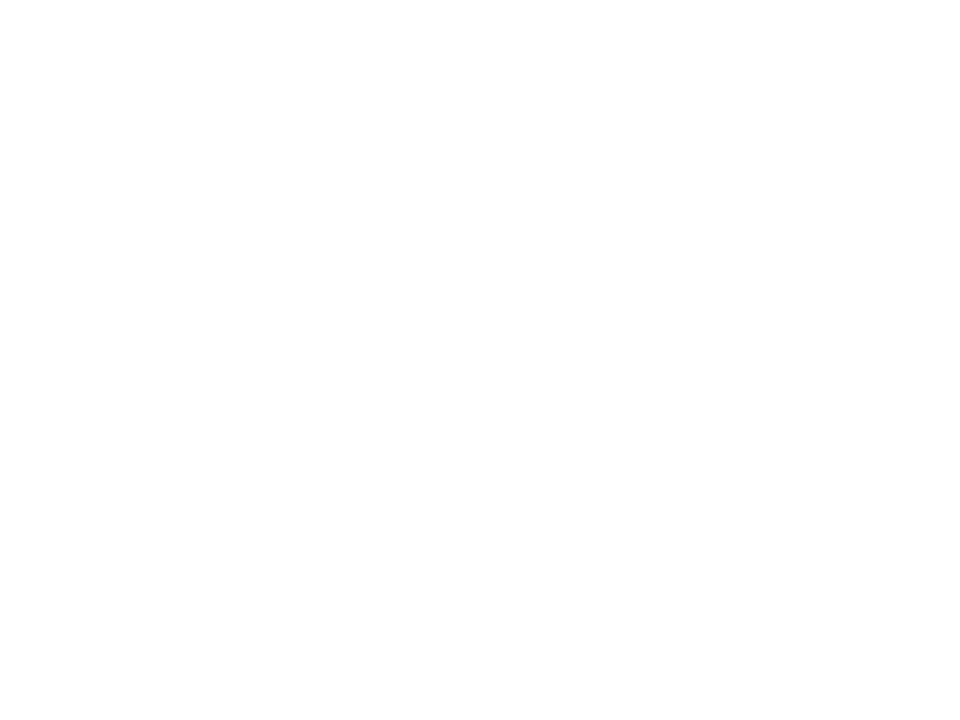

<IPython.core.display.Javascript object>


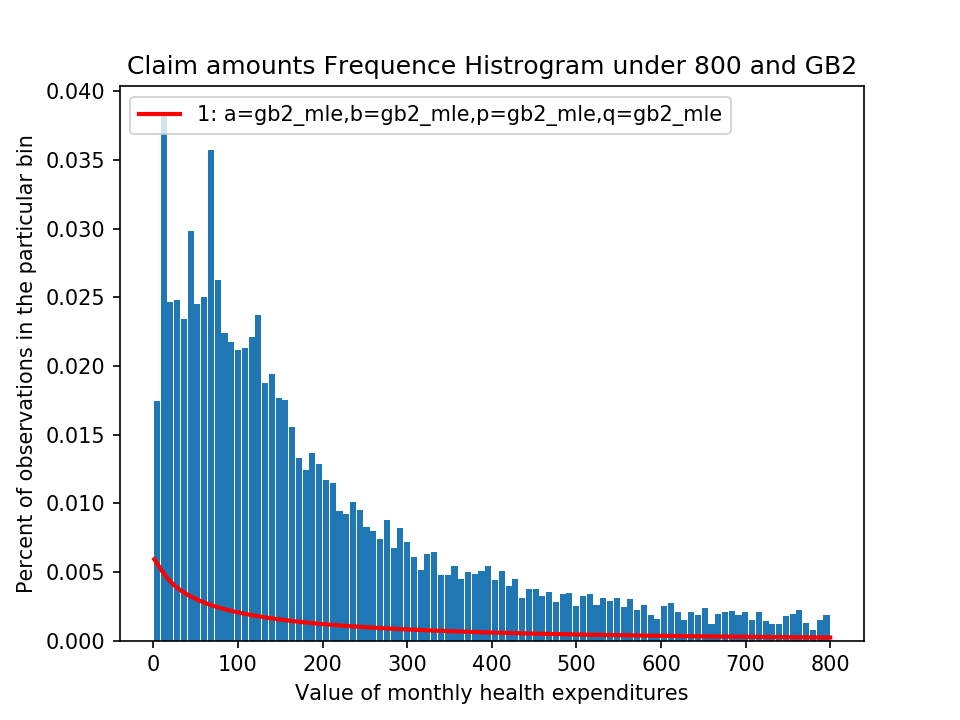

a: 0.3384012279152383
b: 4266523049842.794
p: 3.5584093679726783
q: 9999.993020652317


In [125]:
#Frequency Histogram under 800 and GB2
plt.clf()
plt.cla()
plt.close()
clms_800 = clms_amt[clms_amt <= 800]
num_bins = 100
weights = (1 / clms_amt.shape[0]) * np.ones_like(clms_800)
count, num_bins, patches = plt.hist(clms_800, num_bins, weights=weights, rwidth = 0.9)
plt.title('Claim amounts Frequence Histrogram under 800 and GB2')
plt.xlabel(r'Value of monthly health expenditures')
plt.ylabel(r'Percent of observations in the particular bin')

# Plot smooth line with distribution 1
dist_clms = np.linspace(1, 800, 100)
a_p = a_gb2_mle
b_p = b_gb2_mle
p_p = p_gb2_mle
q_p = q_gb2_mle
print("a:", a_p)
print("b:", b_p)
print("p:", p_p)
print("q:", q_p)
plt.plot(dist_clms, gb2_pdf(dist_clms, a_p, b_p, p_p, q_p),
         linewidth=2, color='r', label='1: a=gb2_mle,b=gb2_mle,p=gb2_mle,q=gb2_mle')
plt.legend(loc='upper left')

# e) Perform a likelihood ratio test for each of the estimated in parts (b) and (c), respectively, against the GB2 specification in part (d).

In [126]:
# Likelihood ratio test GA vs GB2
alpha_ga, beta_ga = np.array([alpha_ga_mle, beta_ga_mle])
print('GA: alpha=', alpha_ga,'beta=', beta_ga)
print('GB2: a=', a_gb2_mle, 'b=', b_gb2_mle, 'p=', p_gb2_mle, 'q=', q_gb2_mle)
log_lik_h0 = log_lik_gamma_ga(clms_amt, alpha_ga_mle, beta_ga_mle)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_h1 = log_lik_gb2(clms_amt, a_gb2_mle, b_gb2_mle, p_gb2_mle, q_gb2_mle)
print('GB2 log likelihood', log_lik_h1)
LR_val = 2 * (log_lik_h1 - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_h0)

GA: alpha= 0.5570632380271622 beta= 998.4240425089374
GB2: a= 0.3384012279152383 b= 4266523049842.794 p= 3.5584093679726783 q= 9999.993020652317
hypothesis value log likelihood -77001.36878468955
GB2 log likelihood -75290.63017822735
likelihood ratio value 3421.477212924394
chi squared of H0 with 4 degrees of freedom p-value =  0.0


In [127]:
# Likelihood ratio test GG vs GB2
alpha_gg, beta_gg, m_gg = np.array([alpha_ga_mle, beta_ga_mle, m_gg_mle])
print('GG: alpha=', alpha_gg,'beta=', beta_gg, 'm=', m_gg_mle)
print('GB2: a=', a_gb2_mle, 'b=', b_gb2_mle, 'p=', p_gb2_mle, 'q=', q_gb2_mle)
log_lik_h0 = log_lik_gamma_gg(clms_amt, alpha_gg_mle, beta_gg_mle, m_gg_mle)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_h1 = log_lik_gb2(clms_amt, a_gb2_mle, b_gb2_mle, p_gb2_mle, q_gb2_mle)
print('GB2 log likelihood', log_lik_h1)
LR_val = 2 * (log_lik_h1 - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 4)
print('chi squared of H0 with 4 degrees of freedom p-value = ', pval_h0)

GG: alpha= 0.5570632380271622 beta= 998.4240425089374 m= 0.337753516697089
GB2: a= 0.3384012279152383 b= 4266523049842.794 p= 3.5584093679726783 q= 9999.993020652317
hypothesis value log likelihood -75295.2588187889
GB2 log likelihood -75290.63017822735
likelihood ratio value 9.257281123107532
chi squared of H0 with 4 degrees of freedom p-value =  0.05498072488165939


# f) Using the estimated GB2 distribution from part (d), how likely am I to have a monthly health care claim of more than 1,000 dollars? How does this amount change if I use the estimated GA distribution from part (b)?

In [128]:
#Claim of 1000 dolars
clm_h0 = 1000

In [129]:
#Using Library from https://github.com/cjohnst5/GBdistributiontree/blob/master/gb2library.py for cdfs
from scipy.special import beta, gamma, betaln, gammaln, betainc, gammainc, erf
from scipy.special import betaln, gammaln, beta, gamma, betainc, gammainc

In [130]:
#Define cdf for GB2
def gb2_cdf( a, b, p, q, y):
        z = np.exp(a * np.log((y/b)) - a*np.log(1 + (y/b)))
        cdf = betainc(p, q, z)
        return cdf

In [134]:
#Probability calculation with GB2 cdf
gb2_cdf_calc = gb2_cdf( a_gb2_mle, b_gb2_mle, p_gb2_mle, q_gb2_mle, clm_h0)
prob_gb2 = 1 - gb2_cdf_calc
print('Probability of claim higher than 1000 dollars:')
print('Prob_GB2', prob_gb2)

Probability of claim higher than 1000 dollars:
Prob_GB2 0.14422721097537305


In [132]:
#Define cdf for GA
def ga_cdf(alpha, beta, m, y):
        z = (y/beta)**alpha
        cdf = gammainc(m, z)
        return cdf 

In [135]:
#Probability calculation with GA cdf
ga_cdf_calc = ga_cdf(alpha_ga_mle, beta_ga_mle, 1, clm_h0)
prob_ga = 1 - ga_cdf_calc
print('Probability of claim higher than 1000 dollars:')
print('Prob_GA', prob_ga)

Probability of claim higher than 1000 dollars:
Prob_GA 0.36755622215816786


# 2. MLE estimation of simple macroeconomic model

In [1]:
# Import the necessary libraries
import numpy as np
import scipy.stats as sts
import requests
import statistics
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import scipy.special as spc

In [2]:
#Import data
macroseries = np.loadtxt('C:\\Users\joset\Documents\GitHub\StructEst_W20\ProblemSets\PS2\MacroSeries.txt', delimiter=',')

In [3]:
#Reshape data
c = macroseries[:,[0]]
k = macroseries[:,[1]]
w = macroseries[:,[2]]
r = macroseries[:,[3]]
print('c4',c[4],'k4',k[4],'w4',w[4],'r4',r[4])

c4 [8140994.1833072] k4 [5632135.94271214] w4 [8082465.98137312] r4 [1.03918305]


# Assume z_0=mu so that z_1=mu. Also beta=0.99

# a) Use the data and equations (3) and (5) to estimate the four parameters by maximum likelihood.

In [4]:
#First estimate z_t (eqn) given initial guesses
alpha_0=0.3
beta=0.99
rho_0=0.4
mu_0=0.7
sigma_0=0.6
err_mu_0=0

alpha=alpha_0
rho=rho_0
mu=mu_0
sigma=sigma_0

z=np.log(w)-np.log(1-alpha)-alpha*np.log(k)

In [5]:
#Build lag of z
from pandas import DataFrame
from pandas import concat
values = DataFrame(z)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
zlag = values.shift(1)
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.803946
t+1  0.803946  1.000000


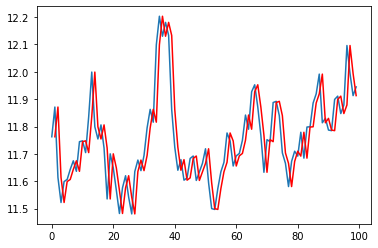

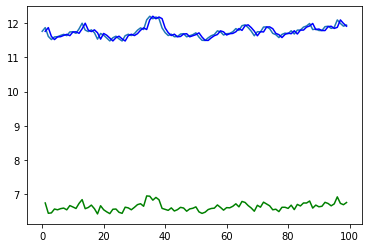

In [6]:
#Check lag of z and errors
from matplotlib import pyplot
pyplot.plot(z)
pyplot.plot(zlag, color='red')
pyplot.show()
err=z-rho*zlag-(1-rho)*mu
pyplot.plot(z)
pyplot.plot(zlag, color='blue')
pyplot.plot(err, color='green')
pyplot.show()

In [37]:
# Define function that generates values of a normal pdf for the errors
def econ_norm_pdf(w, k, mu, sigma, alpha, rho):
    err_mu = 0
    z = np.log(w)-np.log(1-alpha)-alpha*np.log(k)
    values = DataFrame(z)
    zlag = values.shift(1)
    errvals = z-rho*zlag-(1-rho)*mu
    #pdf_vals = ((1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (errvals - mu)**2 / (2 * sigma**2))))
    pdf_vals = ((1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (errvals - err_mu)**2 / (2 * sigma**2))))
    
    return pdf_vals

In [38]:
# Define log likelihood function for the normal distribution
def log_lik_econnorm(w, k, mu, sigma, alpha, rho):
    pdf_vals = econ_norm_pdf(w, k, mu, sigma, alpha, rho)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood: ', log_lik_econnorm(w, k, mu_0, sigma_0, alpha_0, rho_0))

Log-likelihood:  0   -2279.559242
dtype: float64


In [39]:
# Define criterion function for the model
def crit_econ(params, *args):
    mu, sigma, alpha, rho = params
    w, k = args
    log_lik_val = log_lik_econnorm(w, k, mu, sigma, alpha, rho)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [40]:
#Optimize using MLE using model pdf
import scipy.optimize as opt

mu_init = 2.1 #2.08 #2.0860565210150424 #0.1 #mu_0 #5  
sigma_init = 1.1 #0.09 #0.09245361576935274 #1.1 #sigma_0  #2
alpha_init = 0.5 #0.46 #0.46268465821278304 #0.5 #alpha_0 #0.5
rho_init = 0.7 #0.71 #0.7167888847664479 # 0.5 #rho_0 #0.7
params_init = np.array([mu_init, sigma_init, alpha_init, rho_init])
mle_args = (w, k)
results_uncstr = opt.minimize(crit_econ, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, 1), (1e-10, None), (-1, 1)), tol=1e-12)
([mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle]) = results_uncstr.x
print('mu_econ_mle=', mu_econ_mle, ' sigma_econ_mle=', sigma_econ_mle, 'alpha_econ_mle', alpha_econ_mle, 'rho_econ_mle', rho_econ_mle)

mu_econ_mle= 1.5276914658501002  sigma_econ_mle= 0.09731227705608309 alpha_econ_mle 0.25107735497288997 rho_econ_mle 1.0


In [41]:
#Calculate Log lik of MLE estimates
print('Log-likelihood: ', log_lik_econnorm(w, k, mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle))

Log-likelihood:  0    90.178039
dtype: float64


In [42]:
#For the Hessian inverse, run optimizer with L-BFGS-B
mu_init = 1.47 #0.021 #mu_0 #5  
sigma_init = 0.99 #0.09 #sigma_0  #2
alpha_init = 0.81 #0.24 #alpha_0 #0.5
rho_init = 0.99 #rho_0 #0.7
params_init = np.array([mu_init, sigma_init, alpha_init, rho_init])
mle_args = (w, k)
results_bfgs = opt.minimize(crit_econ, params_init, args=(mle_args), method = 'L-BFGS-B',
                              bounds=((1e-10, None), (1e-10, 1), (1e-10, None), (-1, 1)), tol=1e-12)
([mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle]) = results_bfgs.x
print('mu_econ_mle=', mu_econ_mle, ' sigma_econ_mle=', sigma_econ_mle, 'alpha_econ_mle', alpha_econ_mle, 'rho_econ_mle', rho_econ_mle)
print('Log-likelihood: ', log_lik_econnorm(w, k, mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle))

print('Inverse Hessian matrix')
results_bfgs.hess_inv.todense()

mu_econ_mle= 1.505993336272044  sigma_econ_mle= 0.09731249475998308 alpha_econ_mle 0.2510640054962013 rho_econ_mle 1.0
Log-likelihood:  0    90.178039
dtype: float64
Inverse Hessian matrix


array([[ 1.00363511e+00, -7.85329969e-03, -2.41761615e-01,
         4.23733050e-02],
       [-7.85329969e-03,  2.76362499e-02,  8.30237447e-01,
        -1.64888558e-01],
       [-2.41761615e-01,  8.30237447e-01,  2.50061903e+01,
        -4.94250936e+00],
       [ 4.23733050e-02, -1.64888558e-01, -4.94250936e+00,
         1.00000000e+00]])

# b) Use the data and equations (4) and (5) to estimate the four parameters by maximum likelihood.

In [43]:
# Define function that generates values of a normal pdf for the new model
def econ_norm2_pdf(r, k, mu, sigma, alpha, rho):
    err_mu = 0
    z = np.log(r)-np.log(alpha)-(alpha-1)*np.log(k)
    values = DataFrame(z)
    zlag = values.shift(1)
    errvals = z-rho*zlag-(1-rho)*mu
    #pdf_vals = ((1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (errvals - mu)**2 / (2 * sigma**2))))
    pdf_vals = ((1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (errvals - err_mu)**2 / (2 * sigma**2))))
    
    return pdf_vals

In [45]:
# Define log likelihood function for the normal distribution for the new model
def log_lik_econnorm2(r, k, mu, sigma, alpha, rho):
    pdf_vals = econ_norm2_pdf(r, k, mu, sigma, alpha, rho)
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood: ', log_lik_econnorm2(r, k, mu_0, sigma_0, alpha_0, rho_0))

Log-likelihood:  0   -2279.559242
dtype: float64


In [46]:
# Define criterion function for the new model
def crit_econ2(params, *args):
    mu, sigma, alpha, rho = params
    r, k = args
    log_lik_val = log_lik_econnorm2(r, k, mu, sigma, alpha, rho)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [55]:
#Optimize using MLE
import scipy.optimize as opt

mu_init = 1.5 #2.1 #2.08 #2.0860565210150424 #0.1 #mu_0 #5  
sigma_init = 1.1 #0.09 #0.09245361576935274 #1.1 #sigma_0  #2
alpha_init = 0.5 #0.46 #0.46268465821278304 #0.5 #alpha_0 #0.5
rho_init = 0.7 #0.71 #0.7167888847664479 # 0.5 #rho_0 #0.7
params_init = np.array([mu_init, sigma_init, alpha_init, rho_init])
mle_args = (r, k)
results_uncstr2 = opt.minimize(crit_econ2, params_init, args=(mle_args), method = 'TNC',
                              bounds=((1e-10, None), (1e-10, 1), (1e-10, None), (-1, 1)), tol=1e-12)
([mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle]) = results_uncstr2.x
print('mu_econ_mle=', mu_econ_mle, ' sigma_econ_mle=', sigma_econ_mle, 'alpha_econ_mle', alpha_econ_mle, 'rho_econ_mle', rho_econ_mle)

mu_econ_mle= 1.6216979043189428  sigma_econ_mle= 0.09731315189568551 alpha_econ_mle 0.2523287365529045 rho_econ_mle 1.0


In [56]:
#Calculate Log lik of new MLE estimates
print('Log-likelihood: ', log_lik_econnorm2(r, k, mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle))

Log-likelihood:  0    90.177954
dtype: float64


In [57]:
#For the Hessian inverse, run optimizer with L-BFGS-B
mu_init = 1.47 #0.021 #mu_0 #5  
sigma_init = 0.99 #0.09 #sigma_0  #2
alpha_init = 0.81 #0.24 #alpha_0 #0.5
rho_init = 0.99 #rho_0 #0.7
params_init = np.array([mu_init, sigma_init, alpha_init, rho_init])
mle_args = (r, k)
results_bfgs2 = opt.minimize(crit_econ2, params_init, args=(mle_args), method = 'L-BFGS-B',
                              bounds=((1e-10, None), (1e-10, 1), (1e-10, None), (-1, 1)), tol=1e-12)
([mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle]) = results_bfgs2.x
print('mu_econ_mle=', mu_econ_mle, ' sigma_econ_mle=', sigma_econ_mle, 'alpha_econ_mle', alpha_econ_mle, 'rho_econ_mle', rho_econ_mle)
print('Log-likelihood: ', log_lik_econnorm2(r, k, mu_econ_mle, sigma_econ_mle, alpha_econ_mle, rho_econ_mle))

print('Inverse Hessian matrix')
results_bfgs2.hess_inv.todense()

mu_econ_mle= 1.4890042704053374  sigma_econ_mle= 0.09731249755680894 alpha_econ_mle 0.25106426848613606 rho_econ_mle 1.0
Log-likelihood:  0    90.178039
dtype: float64
Inverse Hessian matrix


array([[ 1.00032654e+00,  7.72065908e-05,  6.07747113e-04,
        -1.91455334e-04],
       [ 7.72065908e-05,  1.66917659e-04, -2.56878957e-03,
         1.66123977e-04],
       [ 6.07747113e-04, -2.56878957e-03,  6.54710690e-02,
        -3.66064676e-03],
       [-1.91455334e-04,  1.66123977e-04, -3.66064676e-03,
         2.41598860e-04]])

# c) According to your estimates from part (a), if investment/savings in the current period is kt = 7.500.000 and the productivity shock in the previous period was zt-1 = 10, what is the probability that the interest rate this period will be greater than rt = 1.

In [58]:
#Statistics for checking
mu = np.mean(k)
med = np.median(k)
maxi = max(k)
mini = min(k)
sigma = np.std(k)

# Reporting
print ("Statistics")
print("Mean:", mu)
print("Median:", med)
print("Maximum:", maxi)
print("Minimum:", mini)
print("Stdev:", sigma)

Statistics
Mean: 7472544.557306592
Median: 7135044.59106941
Maximum: [13212559.75196111]
Minimum: [5123678.33190049]
Stdev: 1678258.2803010112


In [59]:
#Calculate probability using the cdf and estimated parameters for the error
from scipy.stats import norm
r_h0 = 1
k_h0 = 7500000
zlag_h0 = 10
z_calc = np.log(r_h0)-np.log(alpha_econ_mle)-(alpha_econ_mle-1)*np.log(k_h0)
mu_z = rho_econ_mle*zlag_h0-(1-rho_econ_mle)*mu_econ_mle
err_calc = z_calc-rho_econ_mle*zlag_h0-(1-rho_econ_mle)*mu_econ_mle
cdf1 = norm.cdf(err_calc, 0, sigma_econ_mle)
prob_econ1 = 1-cdf1
print('z_calc:', z_calc)
print('err_calc:', err_calc)
#print('Prob:', prob_econ1)
print('Probability that the interest rate this period will be greater than 1:', prob_econ1)



#econ2_cdf = norm.cdf(err_calc)
#prob_econ2 = 1-econ2_cdf
#print('Prob:', prob_econ2)

z_calc: 13.238008696465732
err_calc: 3.238008696465732
Probability that the interest rate this period will be greater than 1: 0.0
